In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

# 1. Niño 3.4 index

### 1.1

In [2]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
group_data = ds.sst.sel(lon=slice(190, 240), lat=slice(-5, 5)).groupby('time.month')
sst_anom = group_data - group_data.mean(dim=['time'])

### 1.2

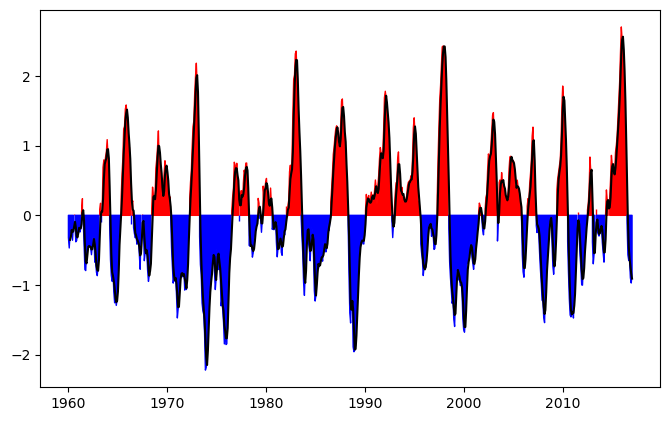

In [3]:
fig, ax = plt.subplots(1,1,figsize=(8,5), dpi=100)
ax.plot(ds.sst.time,sst_anom.rolling(time=3).mean().mean(dim=['lat', 'lon']), color='k')
plt.fill_between(ds.sst.time.to_numpy(),sst_anom.mean(dim=['lat', 'lon']),where=(sst_anom.mean(dim=['lat', 'lon'])>0),color='red')
plt.fill_between(ds.sst.time.to_numpy(),sst_anom.mean(dim=['lat', 'lon']),where=(sst_anom.mean(dim=['lat', 'lon'])<0),color='blue')

plt.show()

## 2. Earth’s energy budget

### 2.1

Text(0.5, 1.0, 'TOA net flux')

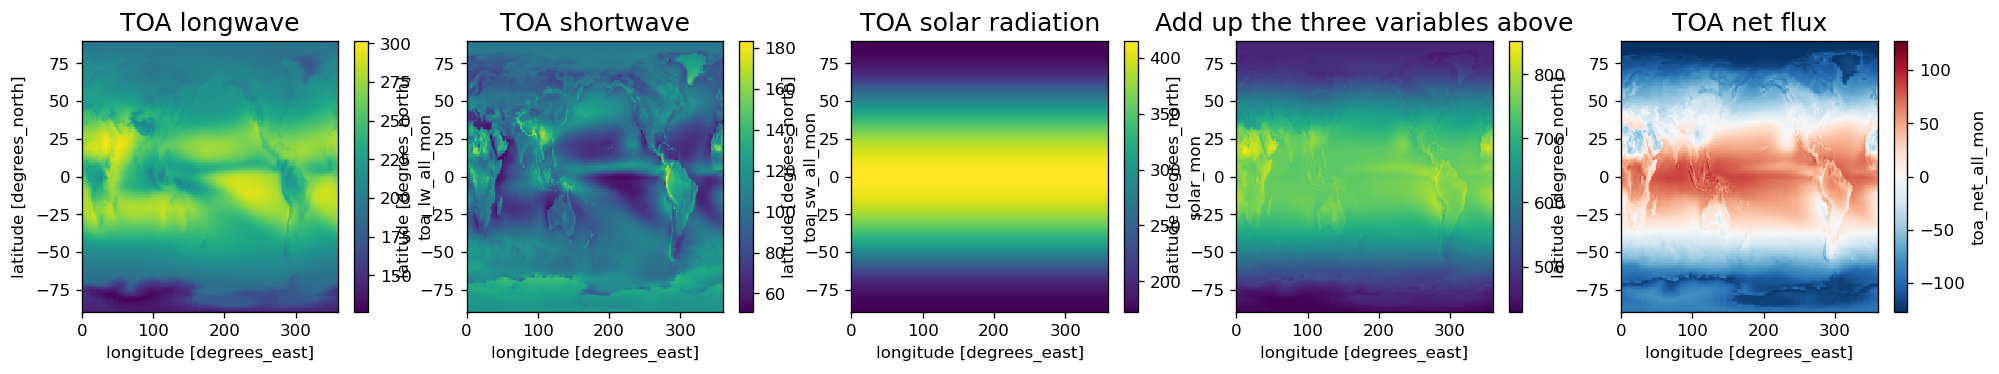

In [4]:
ds_2 = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")

toa_lw = ds_2.toa_lw_all_mon.mean(dim='time')
toa_sw = ds_2.toa_sw_all_mon.mean(dim='time')
toa_solar = ds_2.solar_mon.mean(dim='time')
toa_add = toa_sw + toa_lw + toa_solar
toa_net=ds_2.toa_net_all_mon.mean(dim='time')

fig,axs_2 =plt.subplots(1,5,figsize=(20,3),dpi=120)
toa_lw.plot(ax=axs_2[0])
toa_sw.plot(ax=axs_2[1])
toa_solar.plot(ax=axs_2[2])
toa_add.plot(ax=axs_2[3])
ds_2.toa_net_all_mon.mean(dim='time').plot(ax=axs_2[4])

axs_2[0].set_title('TOA longwave',fontsize=15)
axs_2[1].set_title('TOA shortwave',fontsize=15)
axs_2[2].set_title('TOA solar radiation',fontsize=15)
axs_2[3].set_title('Add up the three variables above',fontsize=15)
axs_2[4].set_title('TOA net flux',fontsize=15)

### 2.2

In [5]:
earth_s = 5.1e14
weights = np.cos(np.deg2rad(ds_2.lat))

toa_lw_weighted = toa_lw.weighted(weights).mean(dim=('lon', 'lat')).values.mean()
toa_sw_weighted = toa_sw.weighted(weights).mean(dim=('lon', 'lat')).values.mean()
toa_solar_weighted = toa_solar.weighted(weights).mean(dim=('lon', 'lat')).values.mean()

print('TOA incoming solar:',toa_solar_weighted.round(1))
print('TOA outgoing longwave:',toa_lw_weighted.round(1))
print('TOA outgoing shortwave:',toa_sw_weighted.round(1))

TOA incoming solar: 340.3
TOA outgoing longwave: 240.3
TOA outgoing shortwave: 99.1


### 2.3

Text(0.5, 1.0, 'The total amount of net radiation in each 1-degree latitude band$(W/m^2)$')

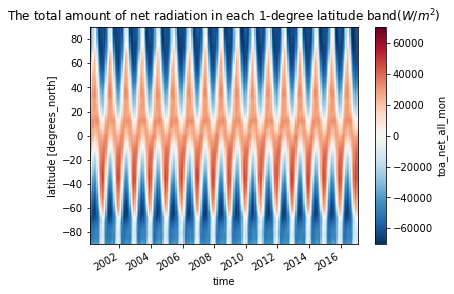

In [6]:
toa_net_perlat=ds_2.toa_net_all_mon.sum(dim=['lon'])
toa_net_perlat.transpose().plot()
plt.title('The total amount of net radiation in each 1-degree latitude band$(W/m^2)$') 

### 2.4

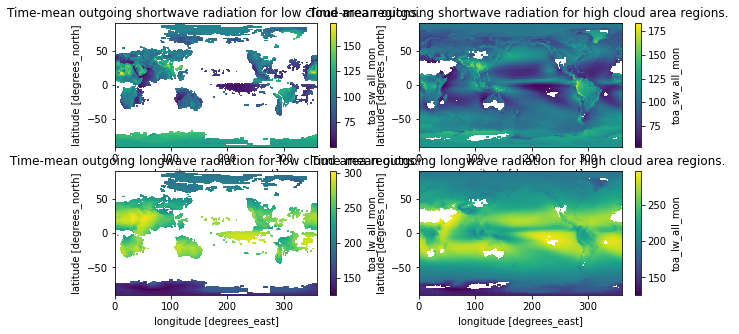

In [7]:
toa_cld=ds_2.cldarea_total_daynight_mon

fig,axs_2_4 = plt.subplots(2,2,figsize=(10,5))
toa_sw_low = toa_sw.where(toa_cld <= 25.0).mean(dim='time')
toa_sw_low.plot(ax=axs_2_4[0,0])
toa_sw_high = toa_sw.where(toa_cld >= 75.0).mean(dim='time')
toa_sw_high.plot(ax=axs_2_4[0,1])
toa_lw_low = toa_lw.where(toa_cld <= 25.0).mean(dim='time')
toa_lw_low.plot(ax=axs_2_4[1,0])
toa_lw_high = toa_lw.where(toa_cld >= 75.0).mean(dim='time')
toa_lw_high.plot(ax=axs_2_4[1,1])
fields = {0:'Time-mean outgoing shortwave radiation for low cloud area regions. ', 
          1:'Time-mean outgoing shortwave radiation for high cloud area regions. ', 
          2:'Time-mean outgoing longwave radiation for low cloud area regions. ', 
          3:'Time-mean outgoing longwave radiation for high cloud area regions. '}
for i, ax in enumerate(axs_2_4.ravel()):
    ax.set_title(fields[i])

### 2.5

In [8]:
toa_sw_low_mean = toa_sw_low.mean()
toa_sw_high_mean = toa_sw_high.mean()
toa_lw_low_mean = toa_lw_low.mean()
toa_lw_high_mean = toa_lw_high.mean()

print('The global mean values of shortwave radiation, composited in low cloud regions %.2f W/m^2'%toa_sw_low_mean)
print('The global mean values of shortwave radiation, composited in high cloud regions %.2f W/m^2'%toa_sw_high_mean)
print('The global mean values of longwave radiation, composited in low cloud regions %.2f W/m^2'%toa_lw_low_mean)
print('The global mean values of longwave radiation, composited in high cloud regions %.2f W/m^2'%toa_lw_high_mean)

The global mean values of shortwave radiation, composited in low cloud regions 103.88 W/m^2
The global mean values of shortwave radiation, composited in high cloud regions 102.12 W/m^2
The global mean values of longwave radiation, composited in low cloud regions 221.04 W/m^2
The global mean values of longwave radiation, composited in high cloud regions 223.44 W/m^2


## 3. Explore a netCDF dataset

### 3.1

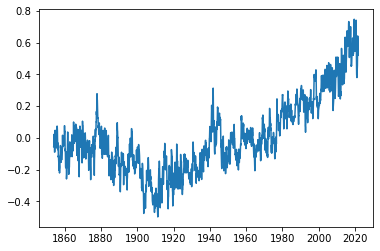

In [9]:
ds_3 = xr.open_dataset("sst.mnmean.nc", engine="netcdf4")
group_data = ds_3.sst.groupby('time.month')
sst_anom = group_data - group_data.mean(dim='time')
plt.plot(ds_3.sst.time,sst_anom.mean(dim=['lat', 'lon']))

### 3.2

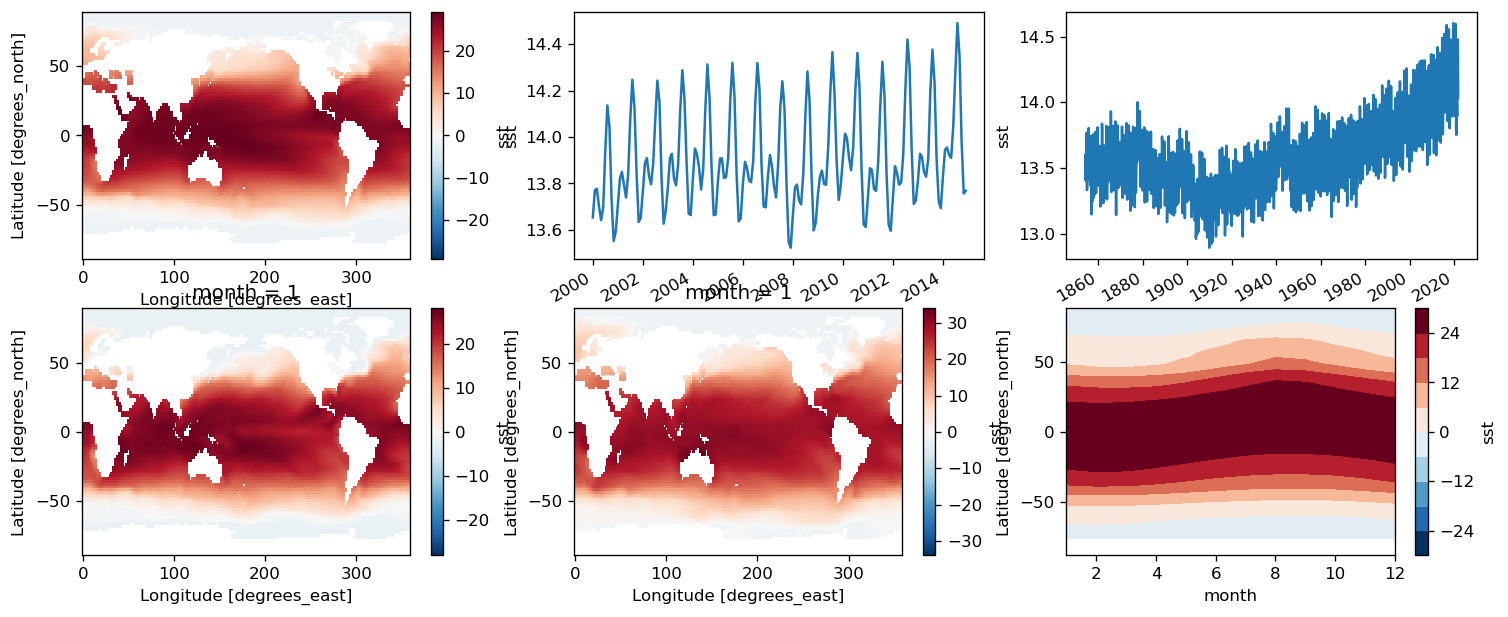

In [10]:
fig, axs_3_2 = plt.subplots(2,3, figsize=(15,6),dpi=120)
ds_3.sst.mean(dim='time').plot(ax=axs_3_2[0,0])
ds_3.sst.mean(dim=('lon', 'lat')).sel(time=slice("2000-01-01", "2014-12-01")).plot(ax=axs_3_2[0,1])
ds_3.sst.groupby('time.month').mean(dim=['lat', 'lon']).plot(ax=axs_3_2[0,2])
ds_3.sst.groupby('time.month').min().sel(month=1).plot(ax=axs_3_2[1,0])
ds_3.sst.groupby('time.month').max().sel(month=1).plot(ax=axs_3_2[1,1])
ds_3.sst.groupby('time.month').mean().mean(dim='lon').plot.contourf(x='month', levels=12)